# <a id='0'>S&P 500</h1>
![S&P500-logo](..\src\utils\img\SP-500-Companies-Inflation.jpg)

- ## <a href='#1'>1. Introduccion</a> 

<b></b>
- ##  <a href='#2'>2. Analisis Exploratio de Datos (EDA)</a>

    - ###  <a href='#2.1.'>2.1. Limpieza de Datos</a>
    - ###  <a href='#2.2.'>2.2. Analisis de Datos</a>

<b></b>
- ##  <a href='#3'>3. Visualizacion de Datos</a>

<b></b>
- ##  <a href='#4'>4. Conclusiones</a>

# <a id='1'>1. Introduccion</a>

#### El siguiente proyecto es una investigación sobre el S&P 500.

Este EDA consiste en analizar los datos y extraer información valiosa de ellos.

El objetivo es aplicar algunas técnicas de limpieza de datos para crear una estructura de datos accesible para el equipo de ciencia de datos, para que puedan aplicar sus modelos.

Para lograrlo, los datos deben ser no solo limpios, sino también ordenados y coherentes.


### Si necesita contactarme:
* Email: **jamr1989@gmail.com**
* Linkedin: **https://www.linkedin.com/in/JuanManiglia**

#### Check my repo in Github: **https://github.com/JuanManiglia**

# <a id='2'>2. Exploratory Data Analysis (EDA)</a> 

### Descripción general

Our data consists on:
 * Datos en formato csv (`S&P500.csv`)
    - CSV con la informacion de los ultimos 5 años del S&P500.

In [1]:
# Librerias Necesarias
######## Modulos Creados ########
from utils import config # Config parametros
from utils.folders import Folders, Saver # Modulo para trabajar con carpetas y guardar archivos
from utils.data_mining import DataAnalyzer # Modulo para el Analisis de Datos
from utils.visualization import Viz # Modulo para la Visualizacion

######## Modulos de Python ########
# Para Data Analisis
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%pylab --no-import-all inline

# para evitar advertencias
import warnings
warnings.filterwarnings("ignore")

C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


Populating the interactive namespace from numpy and matplotlib


Primero, accedemos al directorio raíz para importar los módulos correctamente y lidiar con nuestra estructura de carpetas.

In [2]:
Folders.append_path(jupyter=True)

Then, we read the data from our directory
With the `read_directory_data()` method, we store all the data in dictionary keys, and we can access them easily with only 1 line of code

In [3]:
data = Folders.read_directory_data(path=config.DATA_PATH)

Las siguientes variables ya están listas para usarse:
{'csv': [['S&P500']], 'xlsx': [[]]}


## <a id='2.1.'>2.1. Limpieza de Datos</a> 
Antes de extraer información de los datos, es obligatorio echar un vistazo a su estructura y verificar si hay algunos valores raros, así como valores faltantes o tipos de datos incorrectos asignados a una columna específica.

En esta etapa, se analizarán todos los conjuntos de datos para corregirlos. El proceso será muy similar para cada uno de ellos.

#### Empecemos con `S&P500`

In [4]:
SP500 = data['S&P500']
display(SP500.head())

DataAnalyzer.df_info(SP500)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


####
INFORMACION DEL DATAFRAME
####

Numero de Filas: 619040
Numero de Columnas: 7

#### COLUMNA DEL DATAFRAME ####
 Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object') 

### TIPOs DE COLUMNA DEL DATAFRAME ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB

 None

### TOTAL DE VALORES NaN ###


 date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

### CHEQUEO DE DUPLICADOS ###
 False: 0


En este caso, parece que los datos están formateados correctamente, pero los nombres de las columnas se convertirán a minúsculas para que sean más accesibles.

In [5]:
SP500 = DataAnalyzer.cols_to_lowercase(df=SP500)

Ahora todo parece estar bien

In [6]:
SP500.head()

,date,open,high,low,close,volume,name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


## <a id='2.2.'>2.2. Analisis de Datos</a>

Lo primero que debemos hacer es:
- Vamos a ordenar nuestro Dataframe de la siguiente manera:
    - Cambiando los nombres de las columnas. 
    - Cambiando el orden de la columnas.

<b></b>

- Seguido por:
    - Verificar nuestra columna de fechas para determinar si no hay faltantes y si los hay determinar la razon.
    - Verificar la distribución de los valores para ver si hay algunos valores atípicos que podrían desequilibrar nuestros datos.

<b></b>

- Finalmente:
    - Revisar Outlier.

1.1. Cambiar los nombres de las columnas.

In [7]:
print(f"Columnas de SP500:\n {SP500.columns}\n")
print()

# cambiar el nombre de las columnas. pasarlas a español.
SP500.rename(columns={
    'date' : 'fecha',
    'open': 'apertura',
    'high': 'maximo',
    'low' : 'minimo', 
    'close' : 'cierre',
    'volume' : 'volumen', 
    'name': 'nombre'
}, inplace=True)

print('_______________________________________')
print()

print(f"Columnas de SP500 despues de renombrarlas:\n {SP500.columns}\n")
print()

Columnas de SP500:
 Index(['date', 'open', 'high', 'low', 'close', 'volume', 'name'], dtype='object')


_______________________________________

Columnas de SP500 despues de renombrarlas:
 Index(['fecha', 'apertura', 'maximo', 'minimo', 'cierre', 'volumen', 'nombre'], dtype='object')




1.2. Cambiar el orden de la columna

In [8]:
# Ordenaremos los datos por fecha
SP500.sort_values(by='fecha', inplace=True)

In [9]:
SP500.head()

,fecha,apertura,maximo,minimo,cierre,volumen,nombre
0,2013-02-08,15.07,15.1200,14.630,14.75,8407500,AAL
508224,2013-02-08,81.22,81.9300,80.940,81.89,296853,SLG
506965,2013-02-08,78.24,79.0700,78.125,79.07,4632684,SLB
85755,2013-02-08,236.64,238.6924,235.750,238.16,552207,BLK
505706,2013-02-08,89.04,89.4800,88.910,89.16,554948,SJM


In [10]:
SP500_ordenado = [
    'fecha', 
    'nombre', 
    'apertura',
    'cierre',
    'maximo', 
    'minimo',
    'volumen'
]

# Reassign the variables to get the desired order
SP500_final = SP500[SP500_ordenado]

In [11]:
SP500_final.head()

,fecha,nombre,apertura,cierre,maximo,minimo,volumen
0,2013-02-08,AAL,15.07,14.75,15.1200,14.630,8407500
508224,2013-02-08,SLG,81.22,81.89,81.9300,80.940,296853
506965,2013-02-08,SLB,78.24,79.07,79.0700,78.125,4632684
85755,2013-02-08,BLK,236.64,238.16,238.6924,235.750,552207
505706,2013-02-08,SJM,89.04,89.16,89.4800,88.910,554948


Eliminamos las filas que no se puedan determinar los datos faltantes.

In [12]:
SP500[SP500['apertura'].isnull()]

,fecha,apertura,maximo,minimo,cierre,volumen,nombre
581906,2015-05-12,NaN,NaN,NaN,124.0800,569747,VRTX
478594,2015-06-09,NaN,NaN,NaN,526.0900,12135,REGN
598236,2015-06-26,NaN,NaN,NaN,61.9000,100,WRK
165734,2015-07-17,NaN,88.76,88.24,88.7200,2056819,DHR
434379,2015-07-17,NaN,47.31,46.83,46.9900,1229513,O
205076,2015-07-17,NaN,48.49,47.85,47.9200,1246786,ES
434502,2016-01-12,NaN,NaN,NaN,52.4300,0,O
165857,2016-01-12,NaN,NaN,NaN,88.5500,0,DHR
558213,2016-04-07,NaN,NaN,NaN,41.5600,0,UA
239832,2016-07-01,NaN,NaN,NaN,49.5400,0,FTV


In [13]:
SP500 = SP500.drop([434502, 165857, 558213, 239832, 82949, 598236, 478594, 581906],axis=0)

Comprobamos cuales valores nulos quedan y tratamos de buscar los datos faltantes

In [14]:
SP500[SP500['apertura'].isnull()]

,fecha,apertura,maximo,minimo,cierre,volumen,nombre
165734,2015-07-17,NaN,88.76,88.24,88.72,2056819,DHR
434379,2015-07-17,NaN,47.31,46.83,46.99,1229513,O
205076,2015-07-17,NaN,48.49,47.85,47.92,1246786,ES


In [15]:
print(SP500[(SP500['fecha'] == '2015-07-16') & (SP500['nombre'] == 'DHR')])
print(SP500[(SP500['fecha'] == '2015-07-16') & (SP500['nombre'] == 'O')])
print(SP500[(SP500['fecha'] == '2015-07-16') & (SP500['nombre'] == 'ES')])

             fecha  apertura  maximo  minimo  cierre  volumen nombre
165733  2015-07-16     88.68   88.85    88.0    88.7  4356812    DHR
             fecha  apertura  maximo  minimo  cierre  volumen nombre
434378  2015-07-16     46.85   47.22   46.63    47.2  1282309      O
             fecha  apertura  maximo  minimo  cierre  volumen nombre
205075  2015-07-16     47.68  48.395   47.58    48.3  1080411     ES


Al investigar se llego a la conclusion que el precio de cierre del dia es el de apertura del siguiente dia

In [16]:
SP500.loc[205076:205076,'apertura']=48.3
SP500.loc[165734:165734,'apertura']=88.7
SP500.loc[434379:434379,'apertura']=47.2

In [17]:
SP500[SP500['apertura'].isnull()]

,fecha,apertura,maximo,minimo,cierre,volumen,nombre


Por ultimo vamos a transformar en formato fecha la columna fecha

In [18]:
SP500['fecha'] = pd.to_datetime(SP500['fecha'])

In [19]:
DataAnalyzer.df_info(SP500)

####
INFORMACION DEL DATAFRAME
####

Numero de Filas: 619032
Numero de Columnas: 7

#### COLUMNA DEL DATAFRAME ####
 Index(['fecha', 'apertura', 'maximo', 'minimo', 'cierre', 'volumen', 'nombre'], dtype='object') 

### TIPOs DE COLUMNA DEL DATAFRAME ###

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619032 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   fecha     619032 non-null  datetime64[ns]
 1   apertura  619032 non-null  float64       
 2   maximo    619032 non-null  float64       
 3   minimo    619032 non-null  float64       
 4   cierre    619032 non-null  float64       
 5   volumen   619032 non-null  int64         
 6   nombre    619032 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 57.8+ MB

 None

### TOTAL DE VALORES NaN ###


 fecha       0
apertura    0
maximo      0
minimo      0
cierre      0
volumen     0
nombre

###  1.3. Chequear outliers
#### Analizaremos cómo se distribuyen nuestros datos:
- `apertura`
- `cierre`
- `alza`
- `baja`

Lo haremos basándonos en el IQR (rango intercuartil)

In [20]:
SP500_data = SP500[['apertura', 'cierre', 'maximo', 'minimo']]


In [21]:
# Para los datos de SP500
SP500_Q1 = SP500_data.quantile(0.25)
SP500_Q3 = SP500_data.quantile(0.75)

SP500_IQR = SP500_Q3 - SP500_Q1

print("****** SP500 IQR ******")
print(SP500_IQR)


****** SP500 IQR ******
apertura    54.1500
cierre      54.1692
maximo      54.5600
minimo      53.7100
dtype: float64


In [22]:
SP500_data_outliers = SP500_data[~((SP500_data < (SP500_Q1 - 1.5 * SP500_IQR)) |(SP500_data > (SP500_Q3 + 1.5 * SP500_IQR))).any(axis=1)]


# Comprobando sus formas
print(f"SP500 sin outliers df ; {SP500_data_outliers.shape}")

SP500 sin outliers df ; (579515, 4)


Chequeo de cuántos datos hay dentro de los valores atípicos df

In [23]:
DataAnalyzer.check_data_percentage(df=SP500_data, subset=SP500_data_outliers)
print()

El porcentaje de los datos del subconjunto en los datos en general es: 93.6163%



#### Como podemos ver en la celda de arriba, más del 90 % de los datos están dentro de los límites "normales".

## Finalmente, guardaremos nuestros datos.

### Ahora el equipo de Data Scientist tiene todos los conjuntos de datos condensados ​​en un archivo con el formato adecuado y listo para entrenar un modelo.

In [24]:
Saver.save_output_file(df=SP500_data, path=config.OUTPUT_PATH, filename='SP500')

Se ha guardado el siguiente archivo:
SP500

Lo puedes encontrar aquí: ..\data\output\SP500.csv


In [25]:
DataAnalyzer.df_info(SP500)

####
INFORMACION DEL DATAFRAME
####

Numero de Filas: 619032
Numero de Columnas: 7

#### COLUMNA DEL DATAFRAME ####
 Index(['fecha', 'apertura', 'maximo', 'minimo', 'cierre', 'volumen', 'nombre'], dtype='object') 

### TIPOs DE COLUMNA DEL DATAFRAME ###

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619032 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   fecha     619032 non-null  datetime64[ns]
 1   apertura  619032 non-null  float64       
 2   maximo    619032 non-null  float64       
 3   minimo    619032 non-null  float64       
 4   cierre    619032 non-null  float64       
 5   volumen   619032 non-null  int64         
 6   nombre    619032 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 57.8+ MB

 None

### TOTAL DE VALORES NaN ###


 fecha       0
apertura    0
maximo      0
minimo      0
cierre      0
volumen     0
nombre

#  <a id='3'>3. Visualizacion de Datos</a>

### Una vez que nuestros datos están estructurados, es hora de hacer una visualización de datos para tener una idea coherente de ellos.

##### Ahora que tenemos los datos en el formato correcto para el departamento de Data Science, haremos algunas visualizaciones de los datos.

###  <a id='3.1.'>3.1. Perfil de Reporte</a>
#### Para tener un conocimiento más profundo de nuestros datos, usaremos el método `pandas_profiling.ProfileReport ()` para obtener fácilmente una idea más profunda de ambos conjuntos de datos.

In [26]:
# Asignar variables para cada conjunto de datos
SP500_report = ProfileReport(SP500, title= 'S&P500 Report', explorative=True)

# Save them in the reports folder
SP500_report.to_file(config.REPORTS_PATH + config.SEP + 'SP500 Report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 103.44it/s]


In [27]:
# SP500_report

###  <a id='3.2.'>3.2. Visualizaciones</a>


#### Es hora de analizar los datos de S&P500. En esta etapa haremos algunas visualizaciones.:
- Heatmap para ver correlaciones entre variables.
- 

### Heatmap

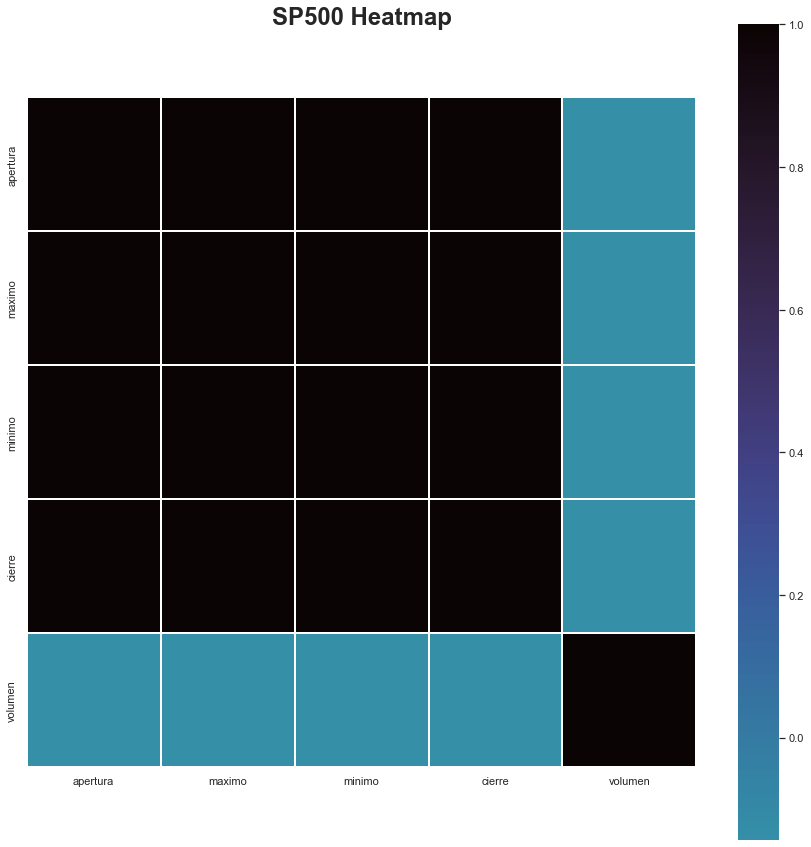

In [28]:
Viz.draw_heatmap(df_corr=SP500.corr(), title="SP500 Heatmap", path=config.STATIC_PATH, filename='SP500_heatmap', save=True)

### Mejores y Peores Compañias

Como no tengo un alto conocimiento sobre la bolsa me guiare con la lista de posiciones que muestra el sitio web `https://www.slickcharts.com/sp500`

La cual indica que los 5 principales son **Apple Inc.**	(AAPL),	**Microsoft Corporation** (MSFT), **Amazon.com Inc.** (AMZN), **Tesla Inc**	(TSLA) y **Alphabet Inc. Class A** (GOOGL) y los ultimos 5 de la lista son **Under Armour Inc. Class A** (UAA), **Discovery Inc. Class A** (DISCA), **Gap Inc.** (GPS), **Under Armour Inc. Class C** (UA) y **News Corporation Class B**	(NWS)

In [33]:
SP500[SP500['nombre'].str.contains('TSL', regex=False)]

,fecha,apertura,maximo,minimo,cierre,volumen,nombre


In [34]:
aapl = SP500.loc[SP500['nombre'] == 'AAPL']
msft = SP500.loc[SP500['nombre'] == 'MSFT']
amzn = SP500.loc[SP500['nombre'] == 'AMZN']
googl = SP500.loc[SP500['nombre'] == 'GOOGL']
fb = SP500.loc[SP500['nombre'] == 'FB']
uaa = SP500.loc[SP500['nombre'] == 'UAA']
disca = SP500.loc[SP500['nombre'] == 'DISCA']
gps = SP500.loc[SP500['nombre'] == 'GPS']
ua = SP500.loc[SP500['nombre'] == 'UA']
nws = SP500.loc[SP500['nombre'] == 'NWS']

In [35]:
mejores_comp = [aapl, msft, amzn, fb, googl]
peores_comp = [uaa, disca, gps, ua, nws]

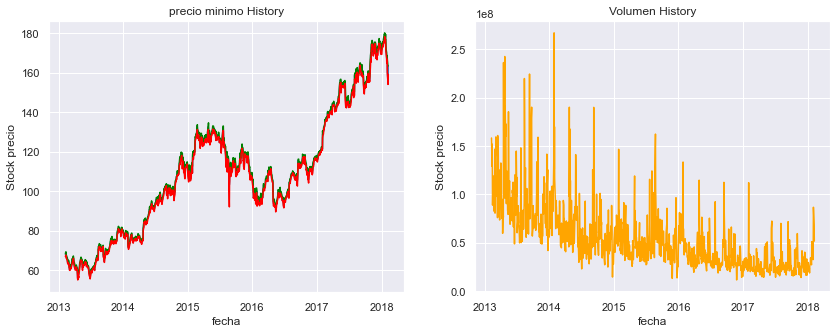

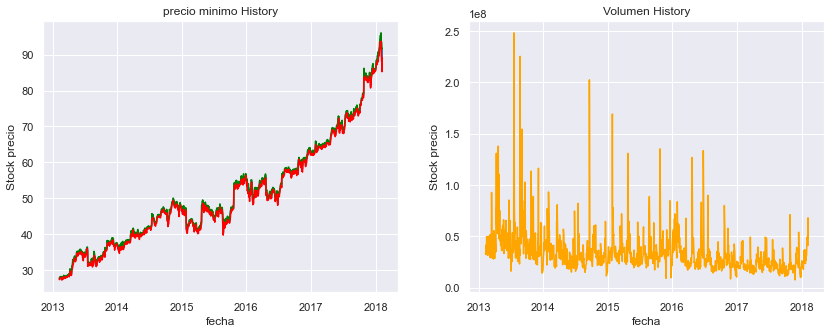

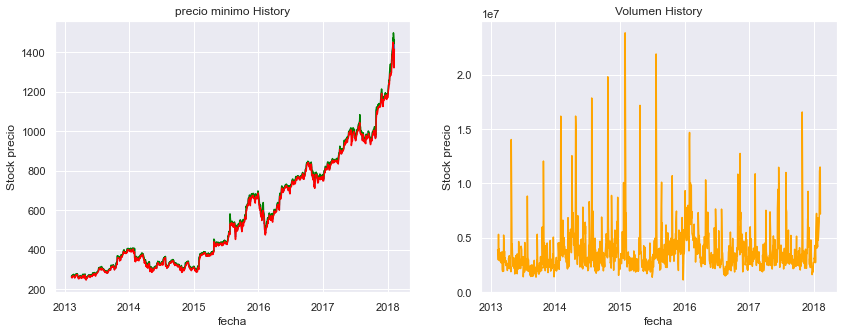

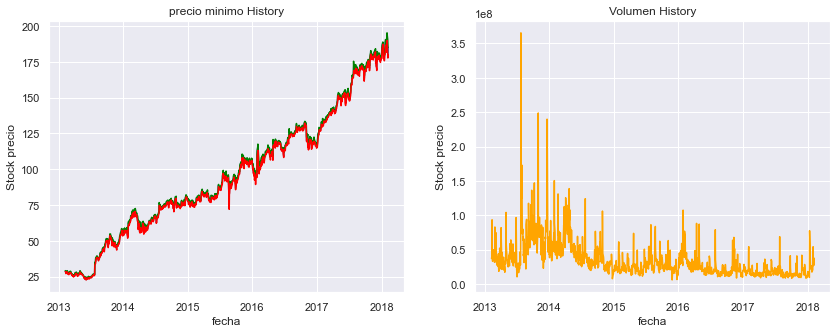

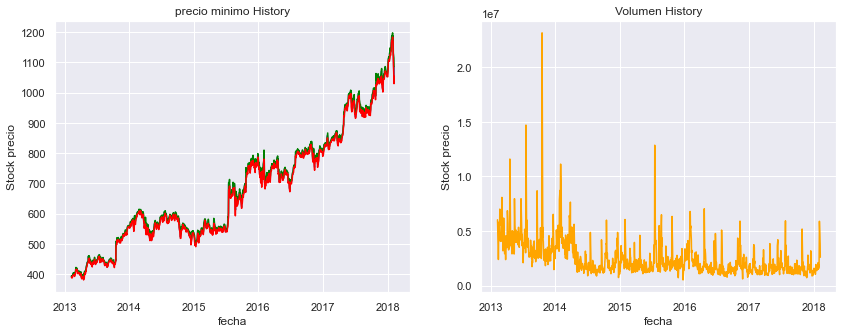

In [40]:
for i in mejores_comp:
    Viz.draw_time_series(i)

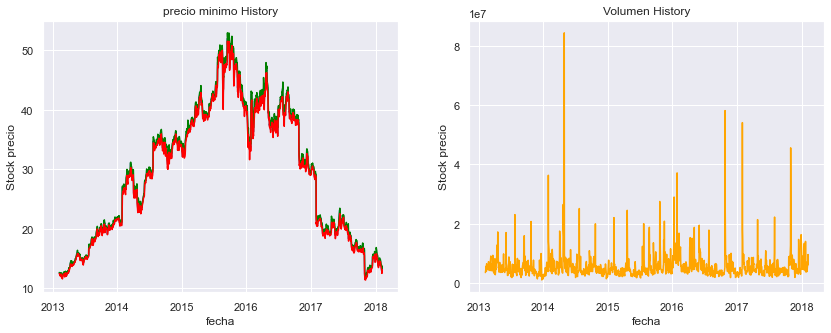

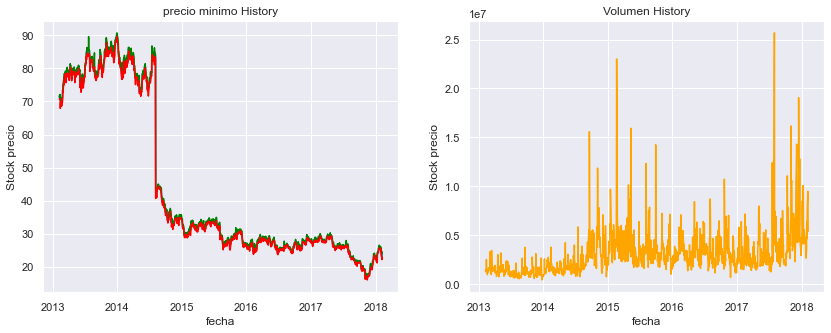

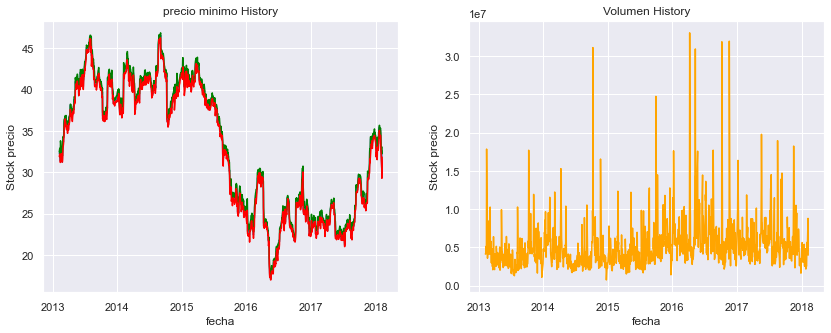

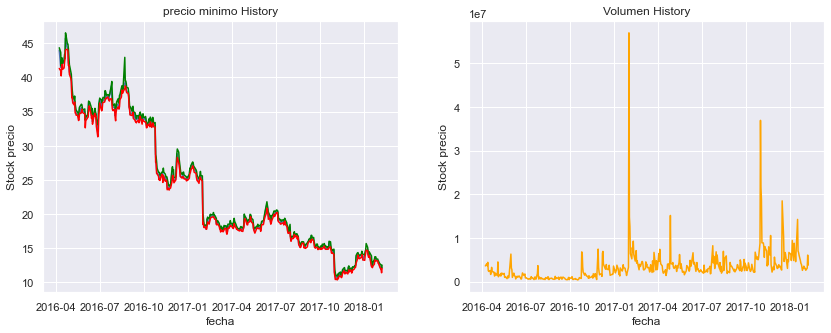

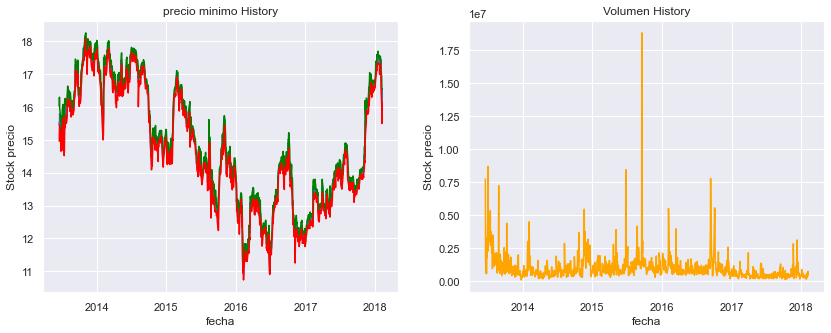

In [41]:
for i in peores_comp:
    Viz.draw_time_series(i)

# <a id='4'>4. Conclusiones</a>


###  <a id='4.1.'>4.1. Sobre los Datos</a>


- ### **Los datos no estan actualizados hasta el dia de hoy solo tenemos 5 años desde 2013 hasta 2018.**
    - Desde el punto de vista del Análista de Datos, hay que precisar otra fuente de datos para tener los datos mas actuales .


- ### **No hubo problemas con los outliers ya que en realcion eran pocos**
    - Hay un pequeño grado de observaciones que se clasificaron como valores atípicos debido a que excedieron la distribución "normal".



###  <a id='4.2.'>4.2. Futuros Proyectos</a>

- ### **Buscar un dataser que este mas completo y volver a realizar un EDA.**

- ### **Intentar realizar un modelo de machine learing para determinar como se desarrollara la bolsa en el tiempo.**

## <a href ='#0'>Volver al inicio</a>